# Gold price prediction

### Historically, gold had been used as a form of currency in various parts of the world including the USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country. Recently, emerging world economies, such as China, Russia, and India have been big buyers of gold, whereas the USA, SoUSA, South Africa, and Australia are among the big seller of gold.

### Forecasting rise and fall in the daily gold rates can help investors to decide when to buy (or sell) the commodity. But Gold prices are dependent on many factors such as prices of other precious metals, prices of crude oil, stock exchange performance, Bonds prices, currency exchange rates, etc.

### The challenge of this project is to accurately predict the future adjusted closing price of Gold ETF across a given period of time in the future. The problem is a regression problem, because the output value which is the adjusted closing price in this project is continuous value

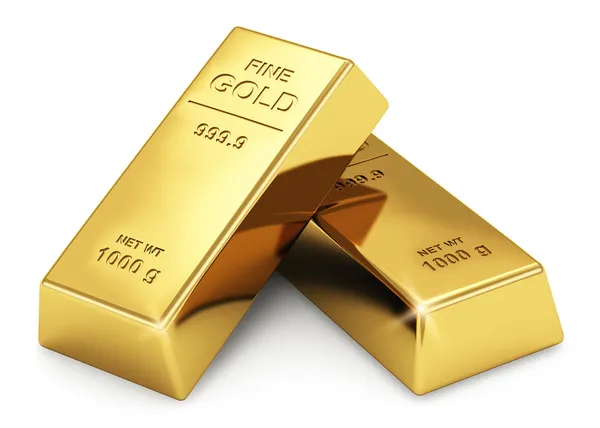

In [2]:
import IPython
IPython.display.Image("https://st.depositphotos.com/1000128/1949/i/450/depositphotos_19492613-stock-photo-gold-ingots.jpg")

# Step 1 : Importing Modules

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score #root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns 
import warnings as w
w.filterwarnings('ignore')
print("Modules Loaded Successfully!")

Modules Loaded Successfully!


# Step 2 : Loading Datasets

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sid321axn/gold-price-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Govind Ahuja\.cache\kagglehub\datasets\sid321axn\gold-price-prediction-dataset\versions\1


In [3]:
# File Read
file_path = path + '/' + os.listdir(path)[0]

# Read data
df = pd.read_csv(file_path)
print('Done')

Done


# Step 3 : Understanding Data Using EDA

In [110]:
# Corrected selected columns
selected_columns = [
    
    'Date','Open', 'High', 'Low', 'Adj Close', 'Volume',
    'SP_close', 'DJ_close', 'EG_close',
    'USDI_Price', 'EU_Price',
    'SF_Price', 'PLT_Price', 'PLD_Price', 'USO_Close',
    'GDX_Close', 'RHO_PRICE'
]

# Add target
selected_columns.append('Close')

# Filter dataframe
df_sel = df[selected_columns]

print(df_sel.head())


        Date        Open        High         Low   Adj Close    Volume  \
0 2011-12-15  154.740005  154.949997  151.710007  152.330002  21521900   
1 2011-12-16  154.309998  155.369995  153.899994  155.229996  18124300   
2 2011-12-19  155.479996  155.860001  154.360001  154.869995  12547200   
3 2011-12-20  156.820007  157.429993  156.580002  156.979996   9136300   
4 2011-12-21  156.979996  157.529999  156.130005  157.160004  11996100   

     SP_close     DJ_close   EG_close  USDI_Price  EU_Price  SF_Price  \
0  122.180000  11868.80957  72.900002      80.341    1.3018     53604   
1  121.589996  11866.38965  74.900002      80.249    1.3035     53458   
2  120.290001  11766.25977  64.699997      80.207    1.2995     52961   
3  123.930000  12103.58008  67.000000      80.273    1.3079     53487   
4  124.169998  12107.74023  68.500000      80.350    1.3045     53148   

   PLT_Price  PLD_Price  USO_Close  GDX_Close  RHO_PRICE       Close  
0    1414.65     618.85  36.130001  51.680000

In [112]:
df_sel.head()

Date        Open        High         Low   Adj Close    Volume  \
0 2011-12-15  154.740005  154.949997  151.710007  152.330002  21521900   
1 2011-12-16  154.309998  155.369995  153.899994  155.229996  18124300   
2 2011-12-19  155.479996  155.860001  154.360001  154.869995  12547200   
3 2011-12-20  156.820007  157.429993  156.580002  156.979996   9136300   
4 2011-12-21  156.979996  157.529999  156.130005  157.160004  11996100   

     SP_close     DJ_close   EG_close  USDI_Price  EU_Price  SF_Price  \
0  122.180000  11868.80957  72.900002      80.341    1.3018     53604   
1  121.589996  11866.38965  74.900002      80.249    1.3035     53458   
2  120.290001  11766.25977  64.699997      80.207    1.2995     52961   
3  123.930000  12103.58008  67.000000      80.273    1.3079     53487   
4  124.169998  12107.74023  68.500000      80.350    1.3045     53148   

   PLT_Price  PLD_Price  USO_Close  GDX_Close  RHO_PRICE       Close  
0    1414.65     618.85  36.130001  51.680000       1425  152.330002  
1    1420.25     623.65  36.270000  52.680000       1400  155.229996  
2    1411.10     608.80  36.200001  51.169998       1400  154.869995  
3    1434.75     626.65  37.560001  52.990002       1400  156.979996  
4    1429.05     635.90  38.110001  52.959999       1400  157.160004

In [113]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1718 non-null   datetime64[ns]
 1   Open        1718 non-null   float64       
 2   High        1718 non-null   float64       
 3   Low         1718 non-null   float64       
 4   Adj Close   1718 non-null   float64       
 5   Volume      1718 non-null   int64         
 6   SP_close    1718 non-null   float64       
 7   DJ_close    1718 non-null   float64       
 8   EG_close    1718 non-null   float64       
 9   USDI_Price  1718 non-null   float64       
 10  EU_Price    1718 non-null   float64       
 11  SF_Price    1718 non-null   int64         
 12  PLT_Price   1718 non-null   float64       
 13  PLD_Price   1718 non-null   float64       
 14  USO_Close   1718 non-null   float64       
 15  GDX_Close   1718 non-null   float64       
 16  RHO_PRICE   1718 non-nul

In [114]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
             ..
USO_Volume    0
Year          0
Month         0
Day           0
DayOfWeek     0
Length: 85, dtype: int64

In [115]:
df_sel.sample

<bound method NDFrame.sample of            Date        Open        High         Low   Adj Close    Volume  \
0    2011-12-15  154.740005  154.949997  151.710007  152.330002  21521900   
1    2011-12-16  154.309998  155.369995  153.899994  155.229996  18124300   
2    2011-12-19  155.479996  155.860001  154.360001  154.869995  12547200   
3    2011-12-20  156.820007  157.429993  156.580002  156.979996   9136300   
4    2011-12-21  156.979996  157.529999  156.130005  157.160004  11996100   
...         ...         ...         ...         ...         ...       ...   
1713 2018-12-24  119.570000  120.139999  119.570000  120.019997   9736400   
1714 2018-12-26  120.620003  121.000000  119.570000  119.660004  14293500   
1715 2018-12-27  120.570000  120.900002  120.139999  120.570000  11874400   
1716 2018-12-28  120.800003  121.080002  120.720001  121.059998   6864700   
1717 2018-12-31  120.980003  121.260002  120.830002  121.250000   8449400   

        SP_close     DJ_close   EG_close  U

In [116]:
df_sel.shape

(1718, 18)

In [117]:
df_sel.columns

Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'SP_close',
       'DJ_close', 'EG_close', 'USDI_Price', 'EU_Price', 'SF_Price',
       'PLT_Price', 'PLD_Price', 'USO_Close', 'GDX_Close', 'RHO_PRICE',
       'Close'],
      dtype='object')

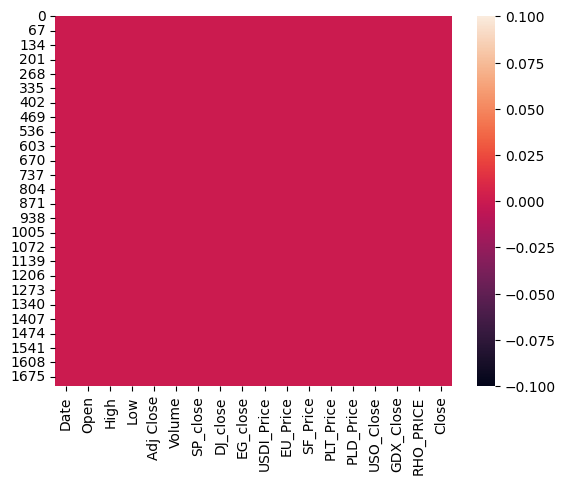

In [118]:
sns.heatmap(df_sel.isna())
plt.show()

In [119]:
df_sel.describe().round(2)

Date     Open     High      Low  Adj Close  \
count                           1718  1718.00  1718.00  1718.00    1718.00   
mean   2015-07-06 19:29:15.995343360   127.32   127.85   126.78     127.32   
min              2011-12-15 00:00:00   100.92   100.99   100.23     100.50   
25%              2013-10-03 06:00:00   116.22   116.54   115.74     116.05   
50%              2015-07-18 12:00:00   121.92   122.33   121.37     121.80   
75%              2017-04-09 06:00:00   128.43   129.09   127.84     128.47   
max              2018-12-31 00:00:00   173.20   174.07   172.92     173.61   
std                              NaN    17.53    17.63    17.40      17.54   

            Volume  SP_close  DJ_close  EG_close  USDI_Price  EU_Price  \
count      1718.00   1718.00   1718.00   1718.00     1718.00   1718.00   
mean    8446327.12    204.49  18164.12     28.21       89.81      1.21   
min     1501600.00    120.29  11766.26      2.80       78.30      1.04   
25%     5412925.00    170.40  15495.67     14.15       81.38      1.12   
50%     7483900.00    205.53  17612.94     22.52       92.88      1.18   
75%    10207950.00    236.89  20851.16     37.19       96.10      1.31   
max    93804200.00    293.58  26828.39     79.80      103.29      1.39   
std     4920730.72     43.78   3884.50     20.29        7.52      0.10   

       SF_Price  PLT_Price  PLD_Price  USO_Close  GDX_Close  RHO_PRICE  \
count   1718.00    1718.00    1718.00    1718.00    1718.00    1718.00   
mean   43284.48    1183.92     766.81      22.11      26.72    1130.44   
min    33170.00     775.60     470.45       7.96      12.47       0.00   
25%    38018.75     944.08     663.21      11.39      20.58     785.00   
50%    40521.50    1098.03     748.30      16.34      23.05    1100.00   
75%    46580.50    1442.86     848.20      34.42      27.32    1307.50   
max    65292.00    1737.60    1197.50      42.01      57.47    2600.00   
std     7530.70     273.84     148.31      11.43      10.60     570.01   

         Close  
count  1718.00  
mean    127.32  
min     100.50  
25%     116.05  
50%     121.80  
75%     128.47  
max     173.61  
std      17.54

In [120]:
for i in df_sel:
    print(f"column_{i}",df_sel[i].unique())
    print('==================',end = '\n\n')

column_Date <DatetimeArray>
['2011-12-15 00:00:00', '2011-12-16 00:00:00', '2011-12-19 00:00:00',
 '2011-12-20 00:00:00', '2011-12-21 00:00:00', '2011-12-22 00:00:00',
 '2011-12-23 00:00:00', '2011-12-27 00:00:00', '2011-12-28 00:00:00',
 '2011-12-29 00:00:00',
 ...
 '2018-12-17 00:00:00', '2018-12-18 00:00:00', '2018-12-19 00:00:00',
 '2018-12-20 00:00:00', '2018-12-21 00:00:00', '2018-12-24 00:00:00',
 '2018-12-26 00:00:00', '2018-12-27 00:00:00', '2018-12-28 00:00:00',
 '2018-12-31 00:00:00']
Length: 1718, dtype: datetime64[ns]

column_Open [154.740005 154.309998 155.479996 ... 119.57     120.620003 120.800003]

column_High [154.949997 155.369995 155.860001 ... 120.900002 121.080002 121.260002]

column_Low [151.710007 153.899994 154.360001 ... 117.610001 117.260002 118.57    ]

column_Adj Close [152.330002 155.229996 154.869995 ... 119.239998 120.57     121.059998]

column_Volume [21521900 18124300 12547200 ... 11874400  6864700  8449400]

column_SP_close [122.18     121.589996 120.

In [121]:
df_sel.shape

(1718, 18)

In [122]:
df_sel.columns

Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'SP_close',
       'DJ_close', 'EG_close', 'USDI_Price', 'EU_Price', 'SF_Price',
       'PLT_Price', 'PLD_Price', 'USO_Close', 'GDX_Close', 'RHO_PRICE',
       'Close'],
      dtype='object')

In [63]:
# df_sel = df_sel.rename(columns={'Close': 'target'})


In [133]:
# Drop redundant and less useful columns
df_sel = df_sel.drop(columns=["Open", "High", "Low", "Adj Close"])

# # Check remaining columns
# print(df_sel.columns)


In [134]:
df_sel.shape

(1718, 14)

In [135]:
stationary_check_gold = df_sel.set_index(['Date'])
stationary_check_gold_price = stationary_check_gold['Close']


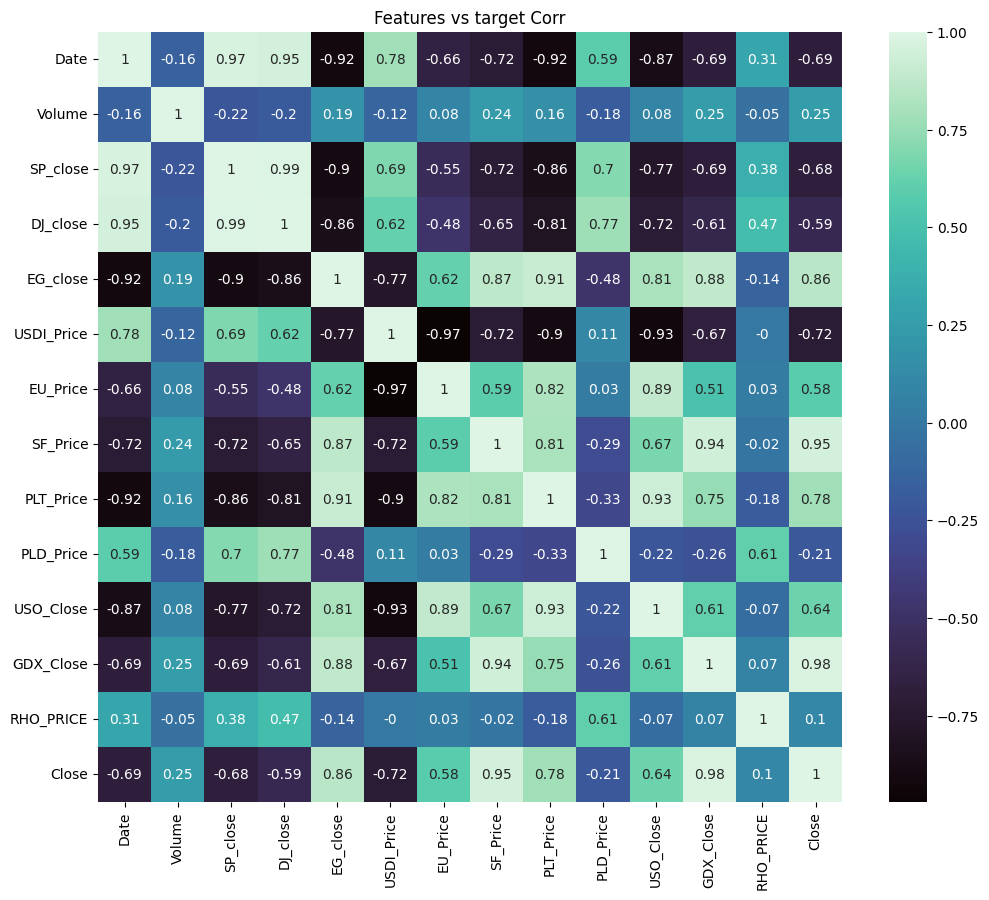

In [136]:
# Checking data Distribution

plt.figure(figsize=(12,10))
plt.title('Features vs target Corr')
sns.heatmap(df_sel.corr().round(2), annot = True,cmap = 'mako')
# cmap = color_map ( -1 to 1)
plt.show()

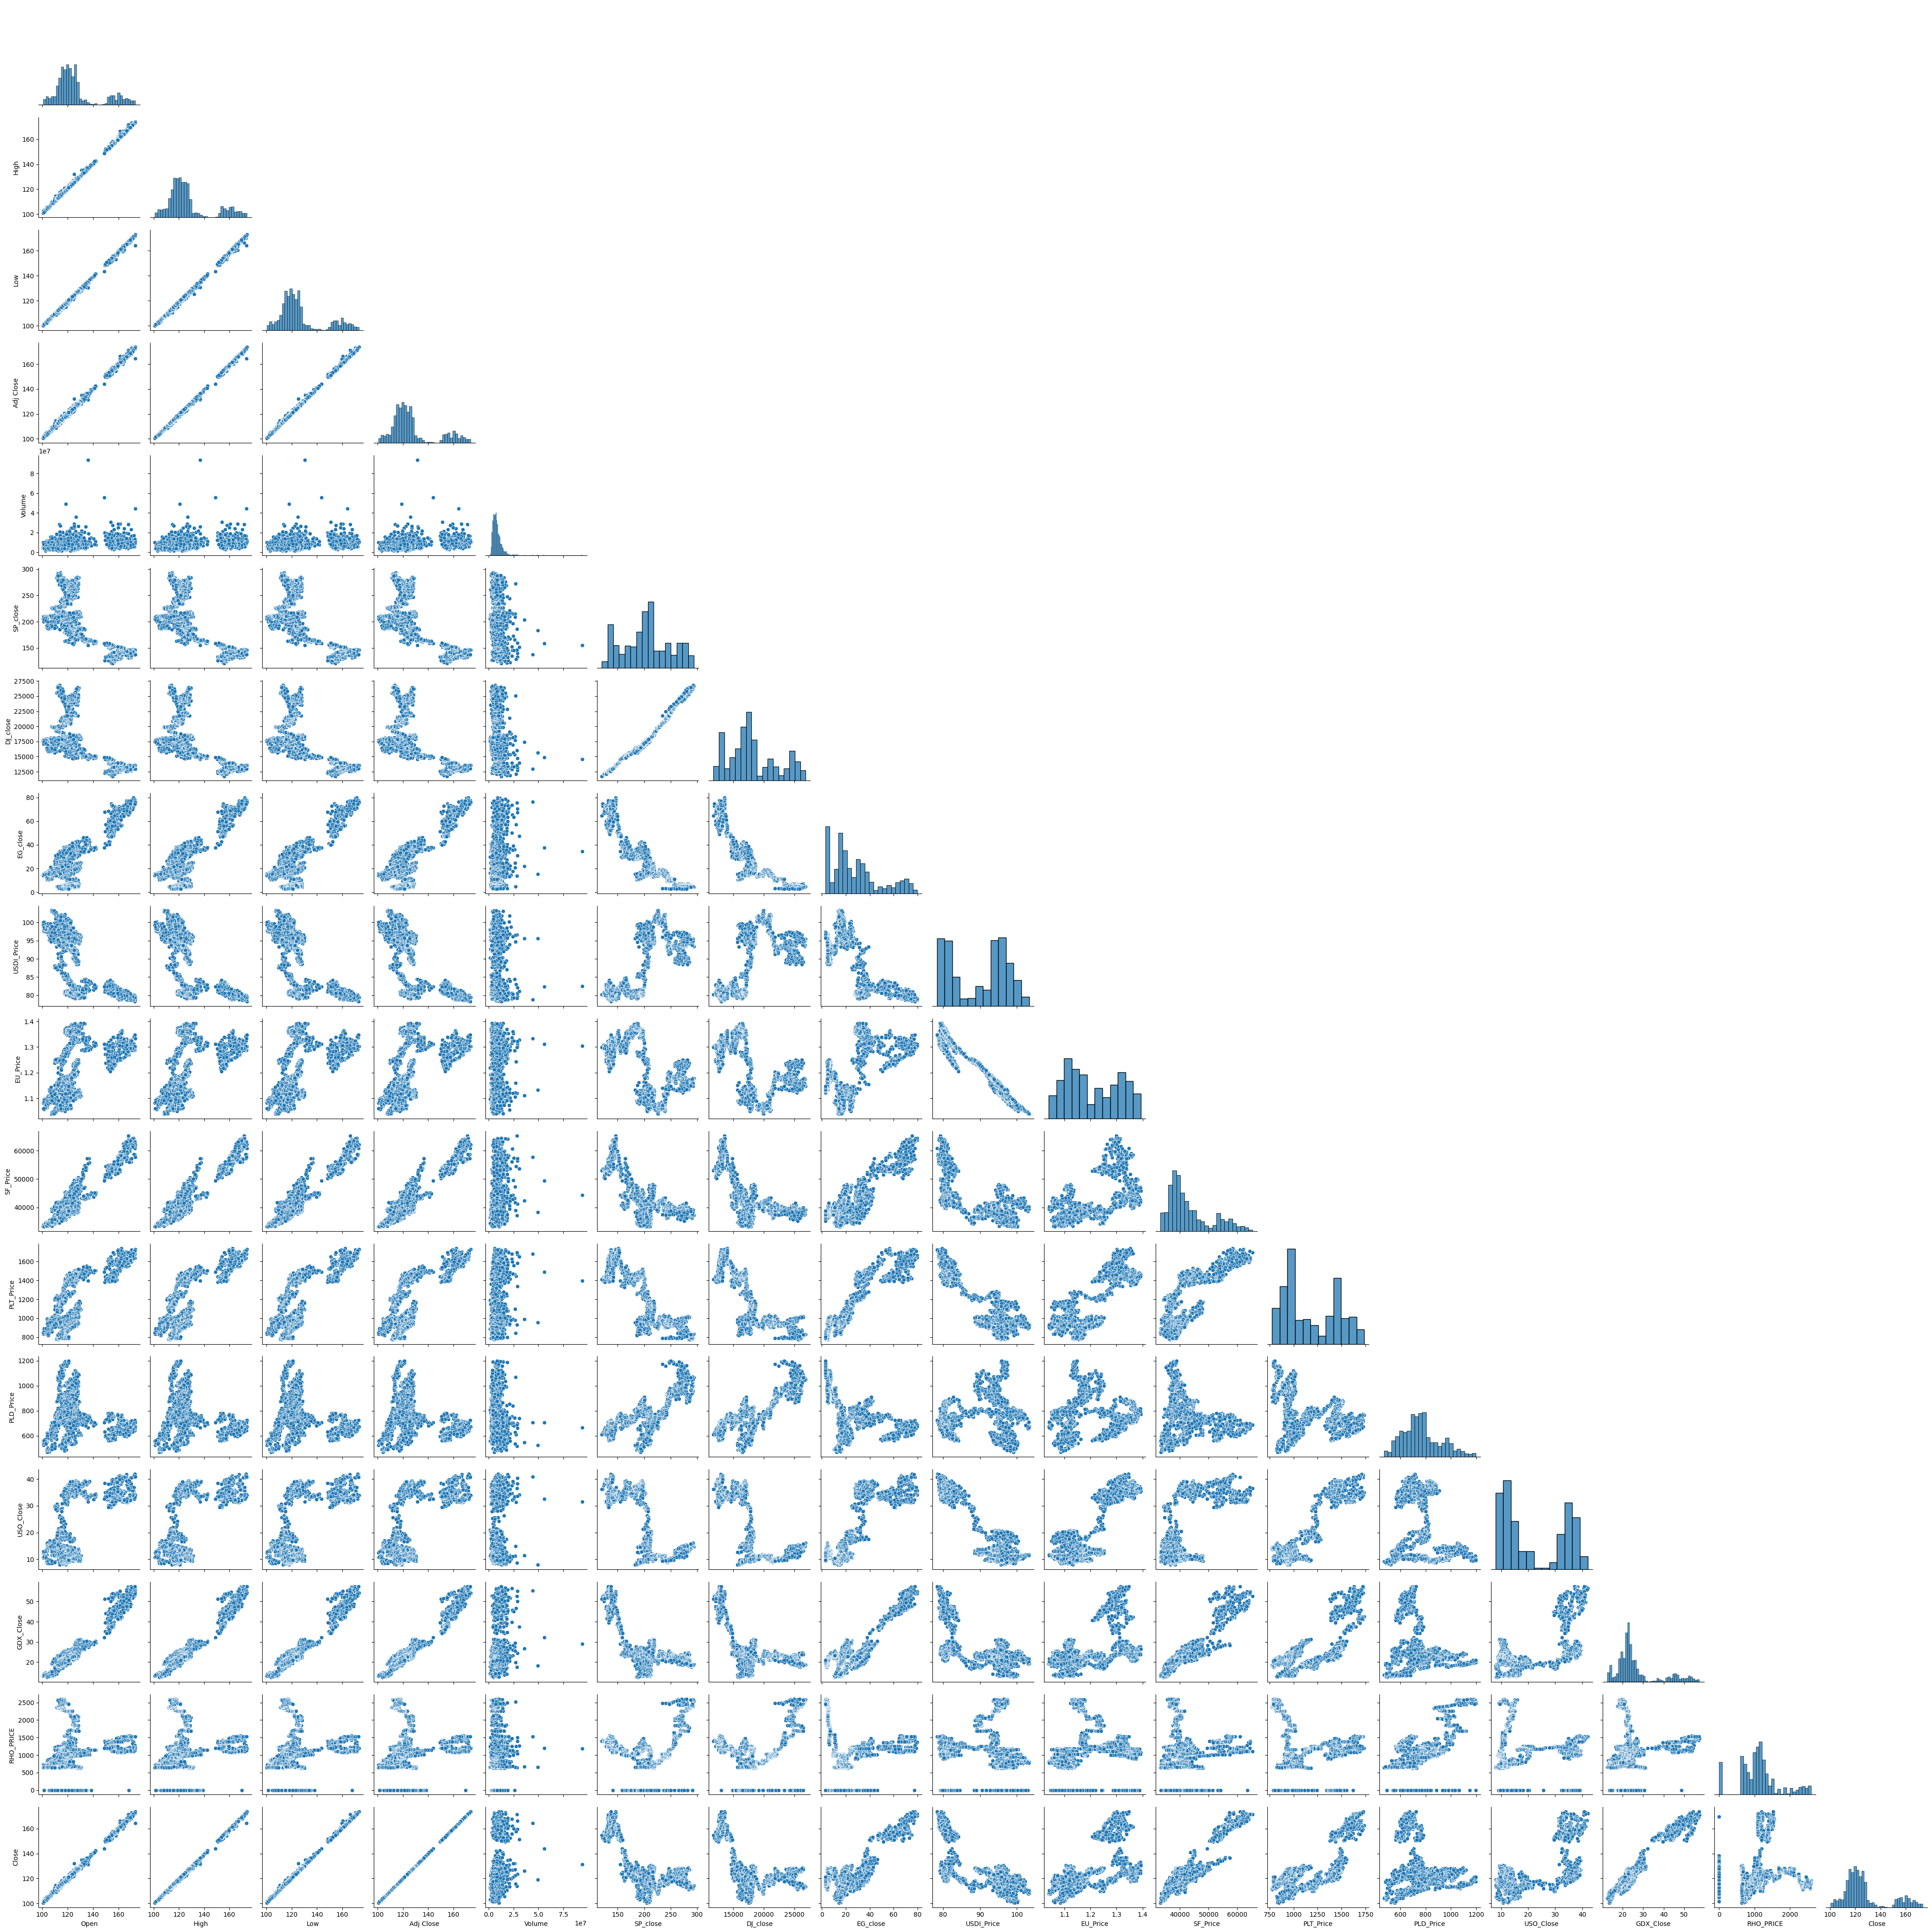

In [127]:
sns.pairplot(data = df_sel,corner=True)
plt.show()

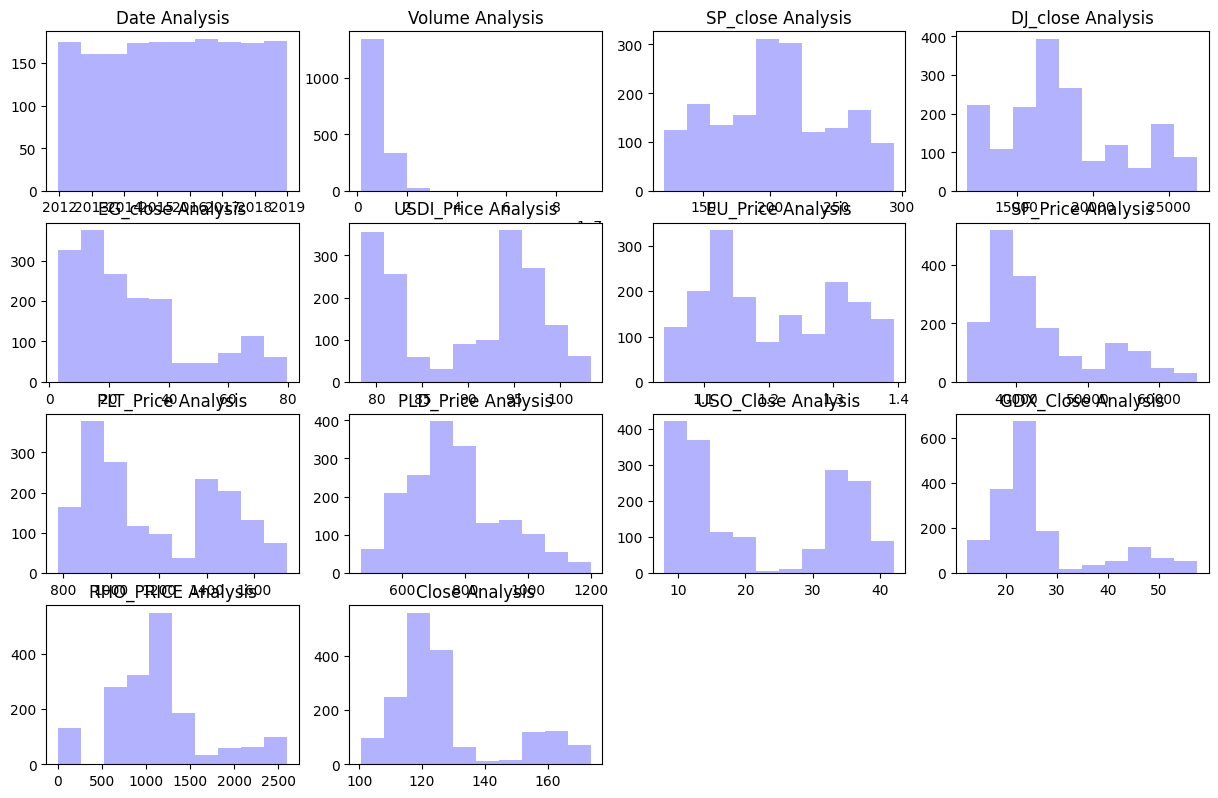

In [137]:
plt.figure(figsize = (15,12))
for i,j in enumerate(df_sel.columns):
  plt.subplot(5,4, i+1)
  plt.hist(df_sel[j],color = 'blue', alpha = 0.3)
  plt.title(j+' Analysis')
plt.show()

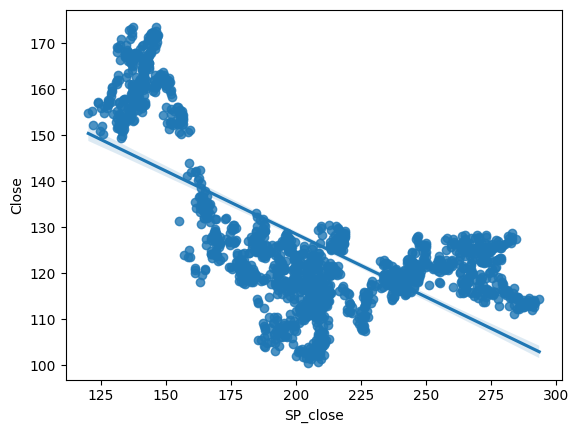

In [138]:
sns.regplot(data = df_sel, x = 'SP_close', y = 'Close')
plt.show()

# Step 4 : Feature Engineering 

In [140]:
from sklearn.preprocessing import MinMaxScaler

# Define features (exclude Date and Close)
feature_cols = [
    "Volume",
    "SP_close","DJ_close","EG_close","USDI_Price","EU_Price",
    "SF_Price","PLT_Price","PLD_Price",
    "USO_Close","GDX_Close","RHO_PRICE"
]

# Separate features (X) and target (y)
X = df_sel[feature_cols]
y = df_sel["Close"]

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled X shape:", X_scaled.shape)


Scaled X shape: (1718, 12)


In [141]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0


# Step 5 : Divide Data into Train and test 


In [142]:
#4.2 Train test spilt
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=50)

In [143]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1030, 12)
(688, 12)
(1030,)
(688,)


# Step 6 : Multi Model Creation

###### 5.1 Linear Regression Model

In [144]:
lr_model = LinearRegression() #object creation

lr_model.fit(X_train,y_train)

LinearRegression()

In [145]:
y_pred = lr_model.predict(X_test)
print('done')

done


In [146]:
lr_compare_df = pd.DataFrame({'Actual Gold Price':y_test,
                              'Predicted Gold Price':y_pred})

print('Done')

Done


In [147]:
lr_compare_df

Actual Gold Price  Predicted Gold Price
233          166.550003            165.914212
58           162.300003            164.517250
1424         121.349998            123.439430
16           158.639999            161.139825
1524         125.980003            123.835557
...                 ...                   ...
1447         122.809998            122.548843
718          112.739998            114.111805
733          120.940002            122.213474
575          121.199997            119.746283
1711         119.239998            119.224153

[688 rows x 2 columns]

In [148]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('Lr MAE',lr_mae)

Lr MAE 1.8692457502916404


In [149]:
lr_mse = mean_squared_error(y_test,y_pred)
print('Lr MSE',lr_mse)

Lr MSE 5.4299391779953705


In [150]:
lr_rmse = lr_mse**.5

print('Lr RMSE',lr_rmse)

Lr RMSE 2.330222988899425


In [151]:
# Trainig Score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score',lr_train_score)

# testing Score
lr_test_score = lr_model.score(X_test,y_test)
print('testing Score',lr_test_score)


Training Score 0.9840427642949007
testing Score 0.9835443068702027


In [152]:
col = list(X.columns)

In [153]:
df_sel.columns

Index(['Date', 'Volume', 'SP_close', 'DJ_close', 'EG_close', 'USDI_Price',
       'EU_Price', 'SF_Price', 'PLT_Price', 'PLD_Price', 'USO_Close',
       'GDX_Close', 'RHO_PRICE', 'Close'],
      dtype='object')

###### 5.2 Random Forest Regressor 

In [154]:
# Step 1: Import the library
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=42) # ensures results are reproducible

In [155]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [156]:
y_pred_rf = rf_model.predict(X_test)

In [157]:
print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Results:
MAE: 0.8839870912500044
MSE: 1.5955842819792638
RMSE: 1.5955842819792638
R2 Score: 0.9951645047124318


In [158]:
# Step 1: Imports
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Step 2: Build a pipeline
svr_pipe = Pipeline([
    ("scaler", StandardScaler()),             # standardize features: mean=0, std=1
    ("svr", SVR(kernel="rbf", C=10, epsilon=0.1, gamma="scale"))  # SVR model
])

# Step 3: Train
svr_pipe.fit(X_train, y_train)

# Step 4: Predict
y_pred_svr = svr_pipe.predict(X_test)

# Step 5: Evaluate
mae  = mean_absolute_error(y_test, y_pred_svr)
mse  = mean_squared_error(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr)
r2   = r2_score(y_test, y_pred_svr)

print("SVR (RBF) results")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

SVR (RBF) results
MAE : 1.3157730375321977
MSE : 3.8283535751266715
RMSE: 3.8283535751266715
R²  : 0.9883979894507944


In [159]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,   # number of trees
    learning_rate=0.1,  # step size shrinkage
    max_depth=5,        # depth of trees
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("XGBoost RMSE:", rmse)


XGBoost RMSE: 1.0997635916597919


In [160]:
# R² Score (goodness of fit)
r2_score = xgb_model.score(X_test, y_test)
print("XGBoost R² Score:", r2_score)

# RMSE (already done above)
print("XGBoost RMSE:", rmse)


XGBoost R² Score: 0.9961194624526869
XGBoost RMSE: 1.0997635916597919


In [163]:
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

def train_and_save_xgb(X_train, X_test, y_train, y_test, model_path="xgb_model.pkl"):
    # 1. Model define
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

    # 2. Train
    xgb_model.fit(X_train, y_train)

    # 3. Prediction
    y_pred = xgb_model.predict(X_test)

    # 4. Score (R²)
    score = r2_score(y_test, y_pred)

    # 5. Save model
    joblib.dump(xgb_model, model_path)

    print(f"✅ Model saved at {model_path} with R² Score = {score:.4f}")

    return score


In [164]:
score = train_and_save_xgb(X_train, X_test, y_train, y_test)
print("Final XGB Score:", score)

✅ Model saved at xgb_model.pkl with R² Score = 0.9962
Final XGB Score: 0.9961743361905171


In [162]:
df_sel.columns

Index(['Date', 'Volume', 'SP_close', 'DJ_close', 'EG_close', 'USDI_Price',
       'EU_Price', 'SF_Price', 'PLT_Price', 'PLD_Price', 'USO_Close',
       'GDX_Close', 'RHO_PRICE', 'Close'],
      dtype='object')

In [165]:
# df_sel आपका DataFrame है
# df_sel.to_csv("data.csv", index=False)
